In [158]:
Dataset link- https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants/download

SyntaxError: invalid syntax (<ipython-input-158-ceb3a7019466>, line 1)

In [159]:
##Importing required libraries for Eda and Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [161]:
df.info()### Looking for full information about the dataset, feature datatypes etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [162]:
df.isnull().sum()### checking missing values in the dataset

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [163]:
#### Lets check for contents of columns to understand which columns are important for the analysis

In [164]:
df['menu_item'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [165]:
df['dish_liked']=df['dish_liked'].fillna('Missing')

### Top 20 popular dishes

In [166]:
df['dish_liked'].value_counts().sort_values(ascending=False).head(20)

Missing                                                                               28078
Biryani                                                                                 182
Chicken Biryani                                                                          73
Friendly Staff                                                                           69
Waffles                                                                                  68
Paratha                                                                                  57
Masala Dosa                                                                              56
Coffee                                                                                   42
Rooftop Ambience                                                                         42
Pizza                                                                                    38
Burgers                                                                         

In [167]:
#Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type_of_service',
                                  'listed_in(city)':'city'})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type_of_service', 'city'],
      dtype='object')

In [168]:
df.drop(['url','phone'],axis=1,inplace=True)

In [169]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type_of_service,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [170]:
df.drop_duplicates(inplace=True) ###dropping 43 no of duplicate rows

In [171]:
df.isnull().sum()

address               0
name                  0
online_order          0
book_table            0
rate               7767
votes                 0
location             21
rest_type           227
dish_liked            0
cuisines             45
cost                345
reviews_list          0
menu_item             0
type_of_service       0
city                  0
dtype: int64

In [172]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type_of_service,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   address          51674 non-null  object
 1   name             51674 non-null  object
 2   online_order     51674 non-null  object
 3   book_table       51674 non-null  object
 4   rate             43907 non-null  object
 5   votes            51674 non-null  int64 
 6   location         51653 non-null  object
 7   rest_type        51447 non-null  object
 8   dish_liked       51674 non-null  object
 9   cuisines         51629 non-null  object
 10  cost             51329 non-null  object
 11  reviews_list     51674 non-null  object
 12  menu_item        51674 non-null  object
 13  type_of_service  51674 non-null  object
 14  city             51674 non-null  object
dtypes: int64(1), object(14)
memory usage: 6.3+ MB


In [174]:
#Some Transformations
df['cost'] = df['cost'].astype(str) #Changing the cost to string

df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float) # Changing the cost to Float
df.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51674 non-null  object 
 1   name             51674 non-null  object 
 2   online_order     51674 non-null  object 
 3   book_table       51674 non-null  object 
 4   rate             43907 non-null  object 
 5   votes            51674 non-null  int64  
 6   location         51653 non-null  object 
 7   rest_type        51447 non-null  object 
 8   dish_liked       51674 non-null  object 
 9   cuisines         51629 non-null  object 
 10  cost             51329 non-null  float64
 11  reviews_list     51674 non-null  object 
 12  menu_item        51674 non-null  object 
 13  type_of_service  51674 non-null  object 
 14  city             51674 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 6.3+ MB


In [175]:
####Reading the unique values of the rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [176]:
###Transformation of rate column
df=df[df['rate']!='NEW']
df=df[df['rate']!='-']


In [177]:
###Removing '/5' from rate column
df['rate']=df['rate'].apply(lambda x: x.replace('/5','') if type(x)==np.str else x)
df['rate']=df['rate'].astype(float)### changing to float datatype


In [178]:
##Adjusting the names column
df['name']=df['name'].apply(lambda x: x.title())


In [179]:
df.isnull().sum()

address               0
name                  0
online_order          0
book_table            0
rate               7767
votes                 0
location             21
rest_type           225
dish_liked            0
cuisines             45
cost                340
reviews_list          0
menu_item             0
type_of_service       0
city                  0
dtype: int64

There are restaurants which have not been rated .If i try to impute it with mean,mode or median and fill the null values ,our analysis may go wrong.So dropping the null values

In [180]:
df.dropna(how='any',inplace=True)###removing all the missing values from the dataset
df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          41237 non-null  object 
 1   name             41237 non-null  object 
 2   online_order     41237 non-null  object 
 3   book_table       41237 non-null  object 
 4   rate             41237 non-null  float64
 5   votes            41237 non-null  int64  
 6   location         41237 non-null  object 
 7   rest_type        41237 non-null  object 
 8   dish_liked       41237 non-null  object 
 9   cuisines         41237 non-null  object 
 10  cost             41237 non-null  float64
 11  reviews_list     41237 non-null  object 
 12  menu_item        41237 non-null  object 
 13  type_of_service  41237 non-null  object 
 14  city             41237 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.0+ MB


In [181]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type_of_service,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",Missing,"North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Missing,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [182]:
df.to_csv('zomato_clean_data')####saving the cleaned data to csv file 

In [183]:
df.drop('dish_liked',axis=1,inplace=True)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          41237 non-null  object 
 1   name             41237 non-null  object 
 2   online_order     41237 non-null  object 
 3   book_table       41237 non-null  object 
 4   rate             41237 non-null  float64
 5   votes            41237 non-null  int64  
 6   location         41237 non-null  object 
 7   rest_type        41237 non-null  object 
 8   cuisines         41237 non-null  object 
 9   cost             41237 non-null  float64
 10  reviews_list     41237 non-null  object 
 11  menu_item        41237 non-null  object 
 12  type_of_service  41237 non-null  object 
 13  city             41237 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.7+ MB


In [221]:
df.describe()

,rate,votes,cost
count,41237.000000,41237.000000,41237.000000
mean,3.702030,352.772001,369.586259
std,0.440034,884.409230,242.522954
min,1.800000,0.000000,1.000000
25%,3.400000,21.000000,200.000000
50%,3.700000,73.000000,400.000000
75%,4.000000,277.000000,500.000000
max,4.900000,16832.000000,950.000000


### Looking for outliers in numerical columns

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


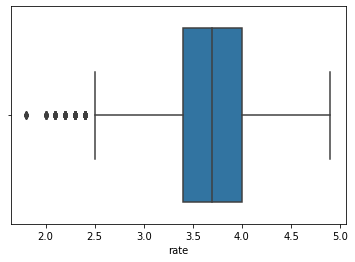

In [220]:
sns.boxplot(df['rate'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


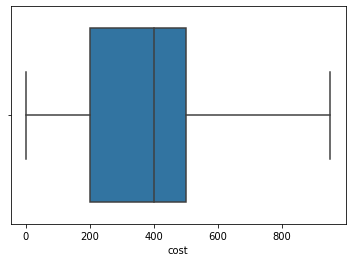

In [222]:
sns.boxplot(df['cost'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


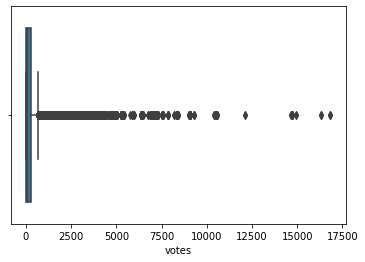

In [223]:
sns.boxplot(df['votes'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


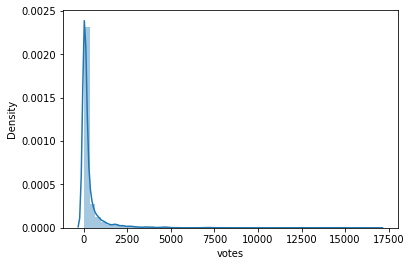

In [224]:
sns.distplot(df['votes'])
plt.show()

#### Looks like no problem of outliers

In [234]:
###Converting to numerical

pandas.factorize() method helps to get the numeric representation of an array by identifying distinct values. This method is available as both pandas.factorize() and Series.factorize().

In [226]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_encoded = Encode(df.copy())
df_encoded.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_of_service,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


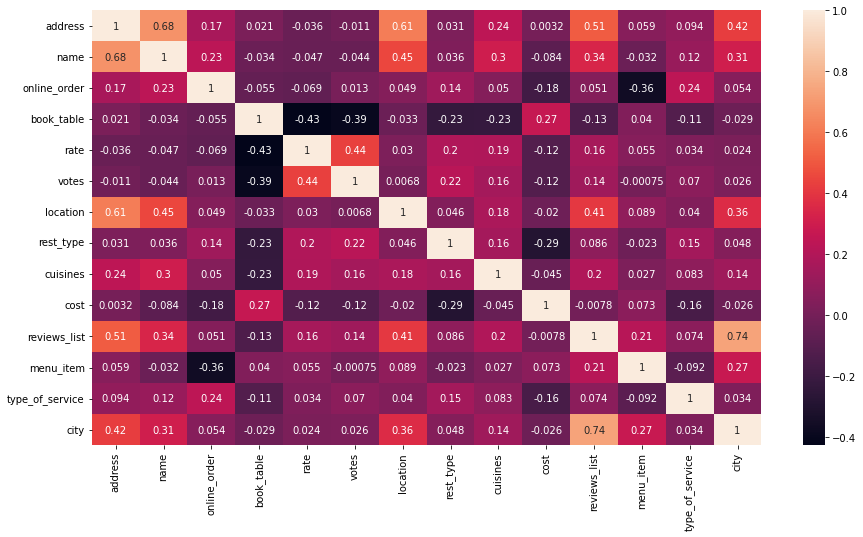

In [232]:
#Get Correlation between different variables
corr = df_encoded.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

In [233]:
df_encoded.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type_of_service', 'city'],
      dtype='object')

## Data Visualization

#### Restaurants delivering online or not


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


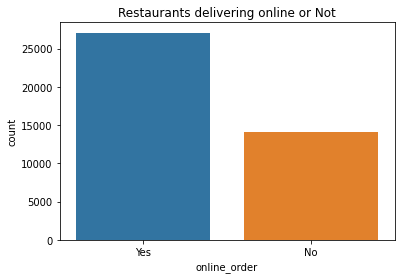

In [184]:
sns.countplot(df['online_order'])
plt.title('Restaurants delivering online or Not')
plt.show()

In [185]:
df['online_order'].value_counts(normalize=True)

Yes    0.656716
No     0.343284
Name: online_order, dtype: float64

#### Most of the restaurants(65%) are having online delivery facility

#### Restaurants are allowing table booking or not

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


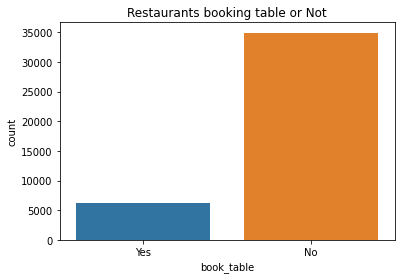

In [186]:
sns.countplot(df['book_table'])
plt.title('Restaurants booking table or Not')
plt.show()

In [187]:
df['book_table'].value_counts(normalize=True)

No     0.847249
Yes    0.152751
Name: book_table, dtype: float64

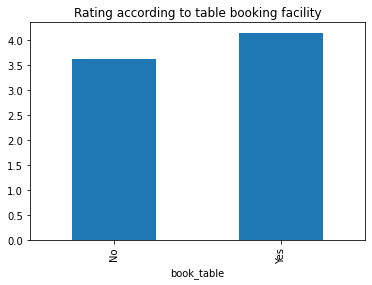

In [188]:
df.groupby('book_table')['rate'].mean().plot.bar()
plt.title('Rating according to table booking facility')
plt.show()

#### 85% of the restaurants dont have the table booking facility and restaurants who have table booking facility are rated higher .

### Relationship between city/location with ratings

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


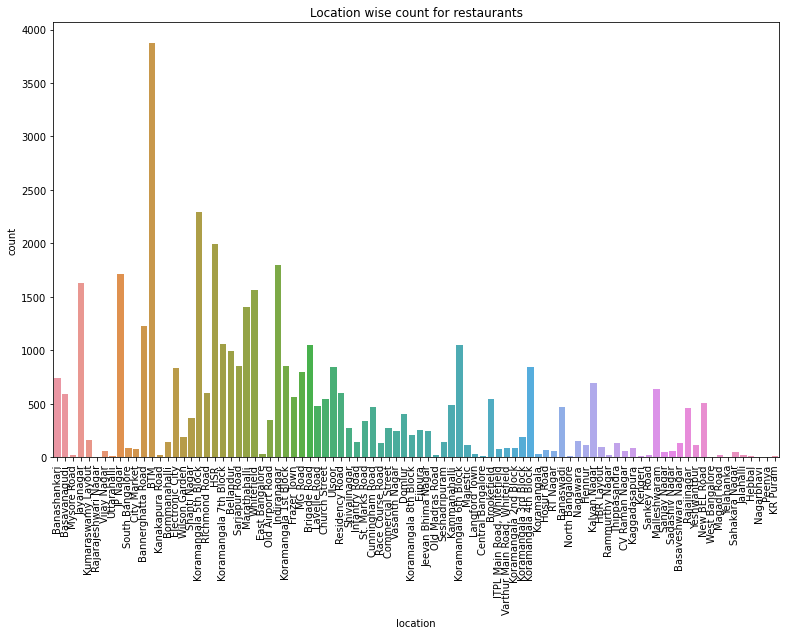

In [189]:
sns.countplot(df['location'])
plt.xticks(rotation=90)
plt.title('Location wise count for restaurants')
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


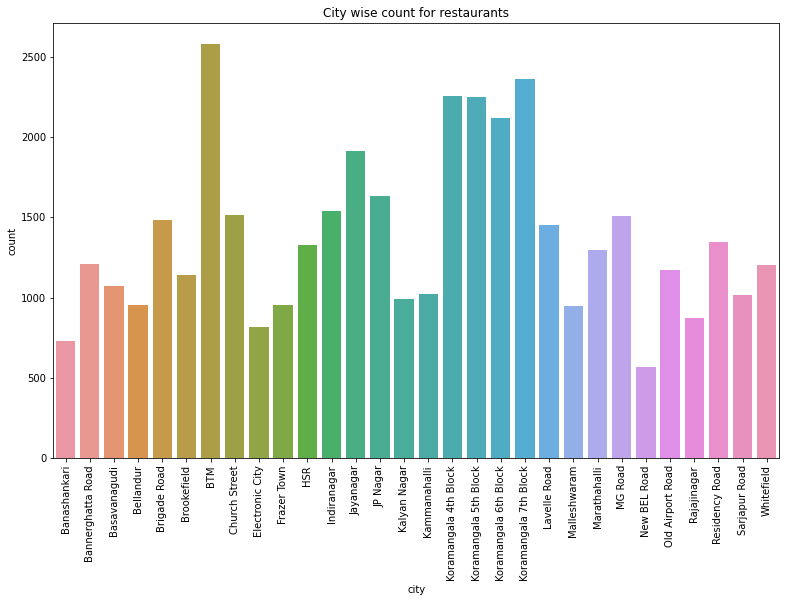

In [190]:
sns.countplot(df['city'])
plt.xticks(rotation=90)
plt.title('City wise count for restaurants')
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

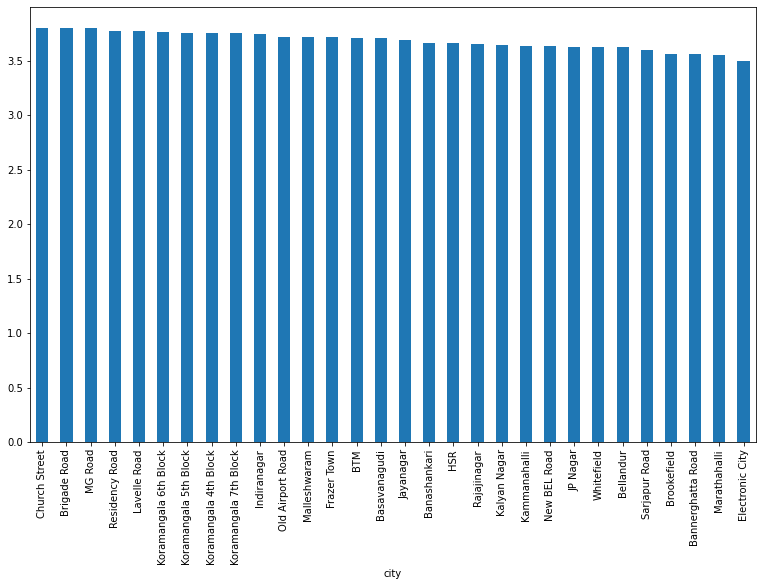

In [191]:
df.groupby('city')['rate'].mean().sort_values(ascending=False).plot.bar()
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

#### Top 10 popular places for restaurants

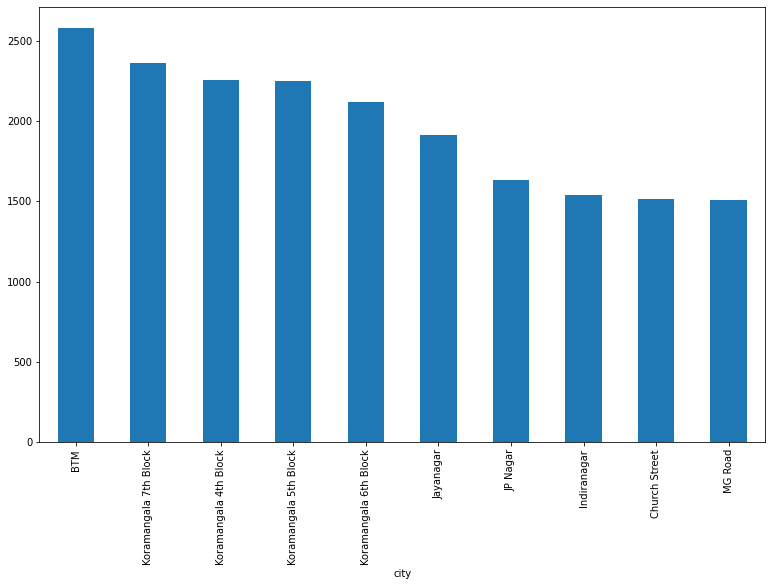

In [192]:
df.groupby('city')['rate'].count().sort_values(ascending=False).head(10).plot.bar()
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

#### Restaurant type

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


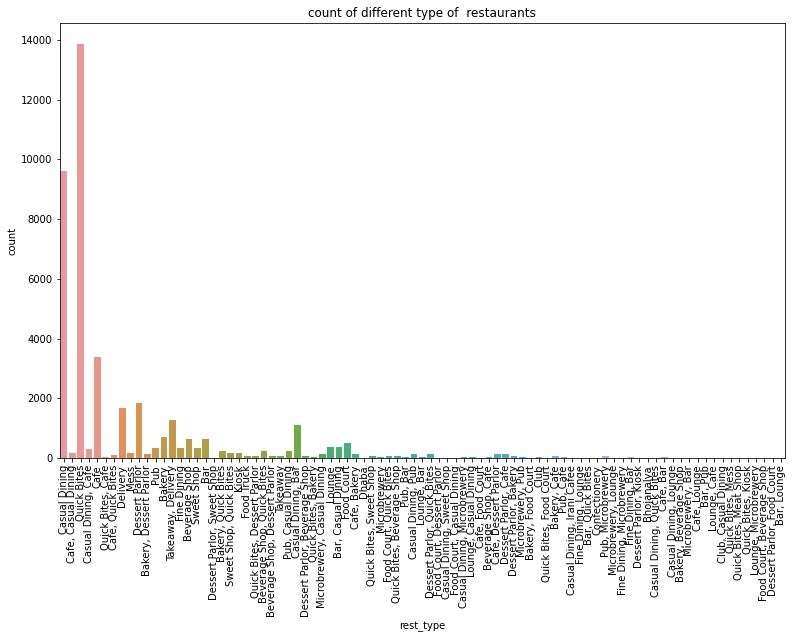

In [193]:
sns.countplot(df['rest_type'])
plt.xticks(rotation=90)
plt.title('count of different type of  restaurants')
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

#### Top 10 restaurant types

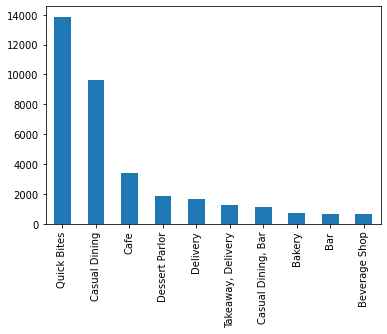

In [194]:
df['rest_type'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.show()

#### Top rated restaurant types

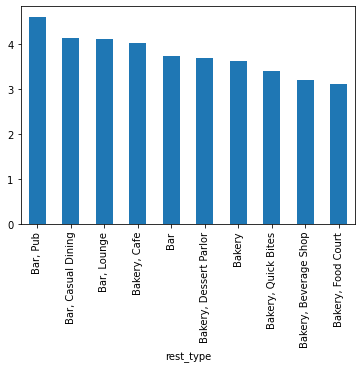

In [195]:
df.groupby('rest_type')['rate'].mean().head(10).sort_values(ascending=False).plot.bar()
plt.show()

#### Top 20 costly restaurant types

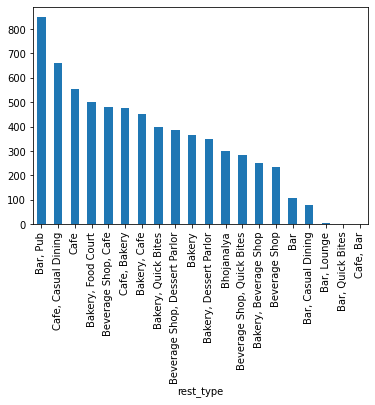

In [196]:
df.groupby('rest_type')['cost'].mean().head(20).sort_values(ascending=False).plot.bar()
plt.show()

### Cuisines

### Top 20 cuisines 

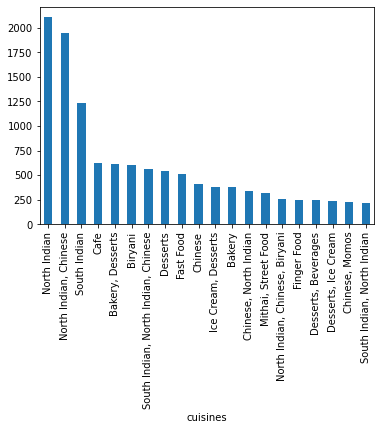

In [197]:
df.groupby('cuisines')['rate'].count().sort_values(ascending=False).head(20).plot.bar()
plt.show()

### Cost of restaurant

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


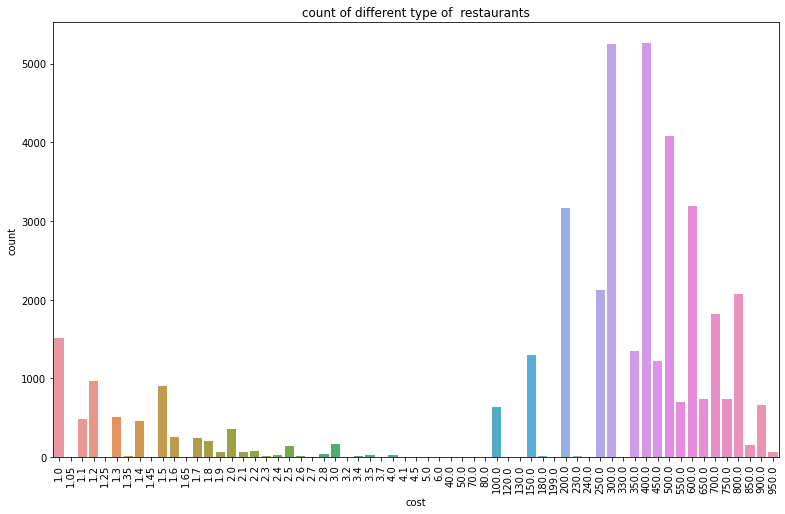

In [198]:
sns.countplot(df['cost'])
plt.xticks(rotation=90)
plt.title('count of different type of  restaurants')
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

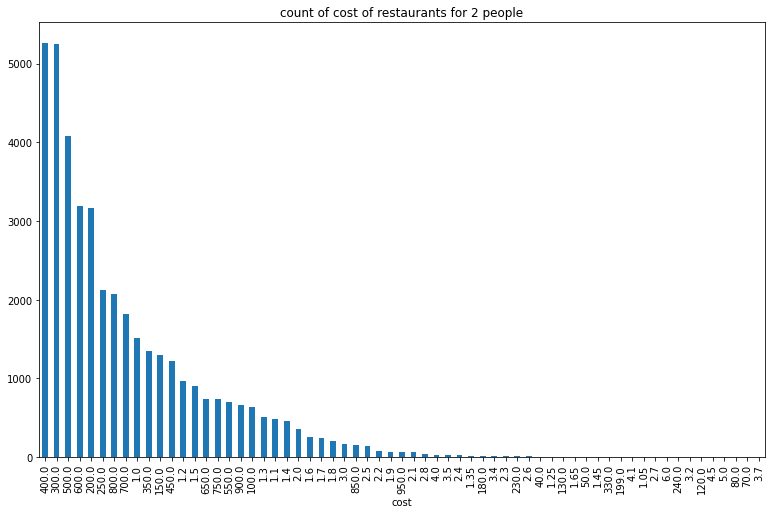

In [199]:
df.groupby('cost')['rate'].count().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.title('count of cost of restaurants for 2 people')
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

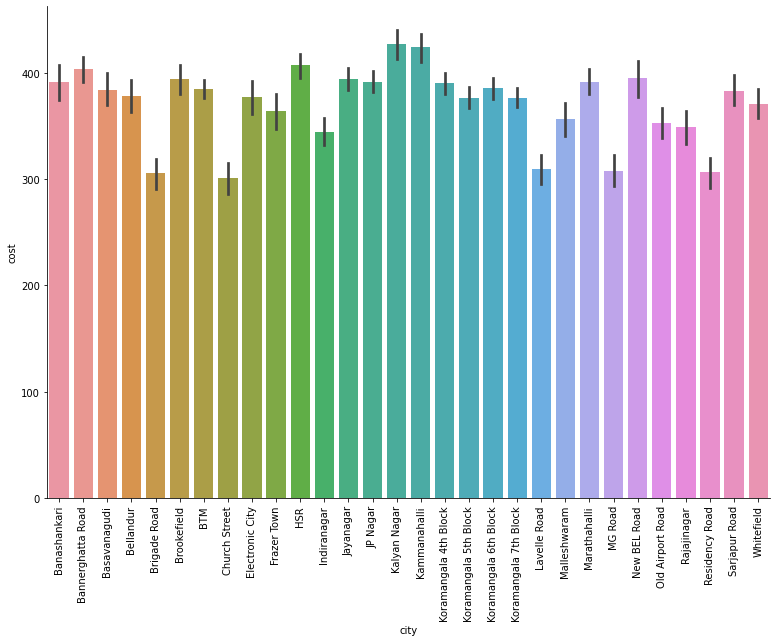

In [200]:
sns.catplot(x='city',y='cost',data=df,kind='bar')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

### Types of services

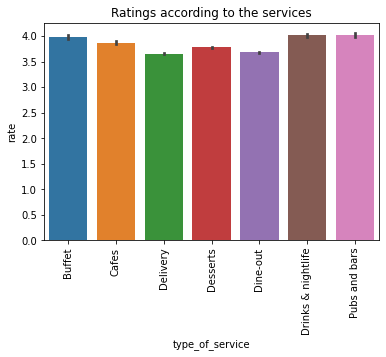

In [201]:
sns.barplot(x='type_of_service',y='rate',data=df)
plt.xticks(rotation=90)
plt.title('Ratings according to the services')
plt.show()

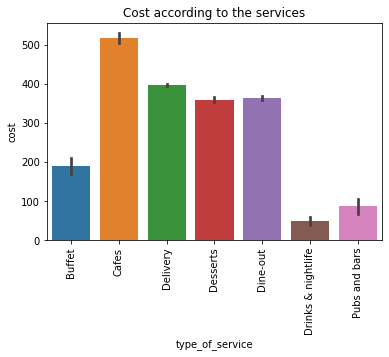

In [202]:
sns.barplot(x='type_of_service',y='cost',data=df)
plt.xticks(rotation=90)
plt.title('Cost according to the services')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


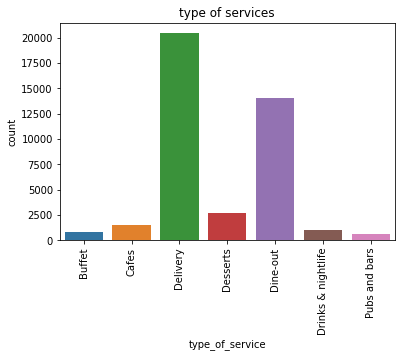

In [203]:
sns.countplot(df['type_of_service'])
plt.xticks(rotation=90)
plt.title('type of services')
plt.show()

#### Most of the restaurants give delivery and dine out services 

In [204]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type_of_service', 'city'],
      dtype='object')

### Most famous restaurants

In [205]:
rest_names=df['name'].value_counts().sort_values(ascending=False).head(20)
rest_names.index

Index(['Cafe Coffee Day', 'Onesta', 'Empire Restaurant', 'Kanti Sweets',
       'Just Bake', 'Five Star Chicken', 'Baskin Robbins', 'Kfc', 'Petoo',
       'Pizza Hut', 'Smoor', 'Mcdonald'S', 'Subway', 'Domino'S Pizza',
       'Sweet Truth', 'Polar Bear', 'Beijing Bites', 'Faasos', 'Burger King',
       'Smally'S Resto Cafe'],
      dtype='object')

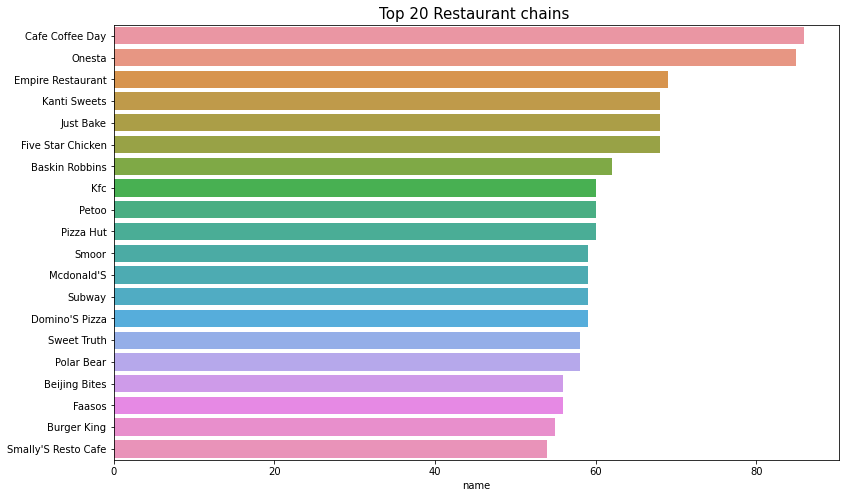

In [206]:
sns.barplot(x=rest_names,y=rest_names.index)
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.title('Top 20 Restaurant chains ',size=15)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


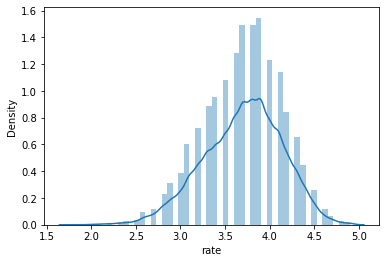

In [207]:
sns.distplot(df['rate'])
plt.show()

In [208]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_of_service,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## Model Building and regression analysis

In [235]:
df_encoded

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_of_service,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
51711,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
51712,8725,6532,1,1,3.6,27,25,17,240,1.5,20956,0,6,29
51715,8786,6568,1,0,4.3,236,56,17,237,2.5,21054,0,6,29


### X & Y split

In [240]:
X=df_encoded.iloc[:,[2,3,5,6,7,8,9,12,13]]
X

,online_order,book_table,votes,location,rest_type,cuisines,cost,type_of_service,city
0,0,0,775,0,0,0,800.0,0,0
1,0,1,787,0,0,1,800.0,0,0
2,0,1,918,0,1,2,800.0,0,0
3,1,1,88,0,2,3,300.0,0,0
4,1,1,166,1,0,4,600.0,0,0
...,...,...,...,...,...,...,...,...,...
51709,1,1,34,25,28,204,800.0,6,29
51711,1,1,81,25,28,761,800.0,6,29
51712,1,1,27,25,17,240,1.5,6,29
51715,1,0,236,56,17,237,2.5,6,29


In [241]:
y=df_encoded['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41237, dtype: float64

### Train Test split



In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=7)

In [244]:
print(X_train.shape)
print(X_test.shape)

(32989, 9)
(8248, 9)


#### Model Building


## linear Regression



In [245]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2772615680233208

### Decision Tree Regressor

In [249]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(min_samples_leaf=.0001)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8064698938726954

### Random Forrest Regressor

In [250]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8538935540710919

### Extra Trees Regressor

In [251]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9180127573180957

In [252]:
import pickle
# Saving model to disk
pickle.dump(ETree, open('model.pkl','wb'))

It can be observed that we have got the best accuracy for Extra tree regressor